# An extra assignment on Statistical Techniques course.
# Identifying an origin of replication in the DNA of CMV Virus.
~~at least attempts to do this~~

by **Voronov Roman**
Group **DS-21-02**

A lot of steps just follow advices from the end of the given document

# Some preparation
#### (Importing the libraries and given dataset)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4
sns.set_palette("bright")

In [2]:
upper_bound = 229354 # the upper bound on pair number. Lower bound is 1
num_of_pals = 296 # The number of palindromes

In [3]:
file = open("palindrome_locations.txt")
lst = file.read().split("\n")[1:]
data = np.array(lst, dtype=int)
data

array([   177,   1321,   1433,   1477,   3248,   3255,   3286,   7263,
         9023,   9084,   9333,  10884,  11754,  12863,  14263,  14719,
        16013,  16425,  16752,  16812,  18009,  19176,  19325,  19415,
        20030,  20832,  22027,  22739,  22910,  23241,  25949,  28665,
        30378,  30990,  31503,  32923,  34103,  34398,  34403,  34723,
        36596,  36707,  38626,  40554,  41100,  41222,  42376,  43475,
        43696,  45188,  47905,  48279,  48370,  48699,  51170,  51461,
        52243,  52629,  53439,  53678,  54012,  54037,  54142,  55075,
        56695,  57123,  60068,  60374,  60552,  61441,  62946,  63003,
        63023,  63549,  63769,  64502,  65555,  65789,  65802,  66015,
        67605,  68221,  69733,  70800,  71257,  72220,  72553,  74053,
        74059,  74541,  75622,  75775,  75812,  75878,  76043,  76124,
        77642,  79724,  83033,  85130,  85513,  85529,  85640,  86131,
        86137,  87717,  88803,  89586,  90251,  90763,  91490,  91637,
      

### Part 1. Simulating palindromes on an DNA

Firstly, I decided to look at a histogram of a real data

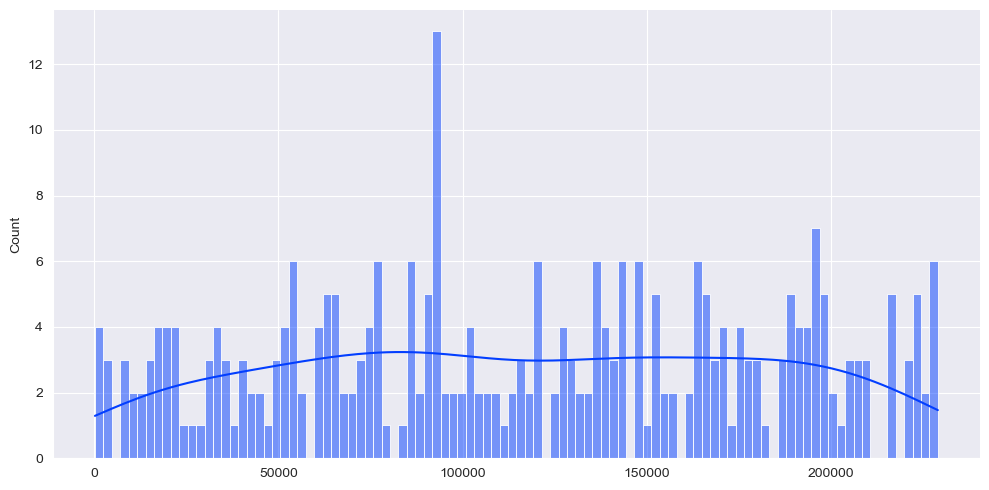

In [4]:
sns.displot(data, bins=100,kde = True, aspect = 2)

Seems like there is one place with a lot of palindromes, some kind of cluster, around 90000-th pair. There are also other fewer clusters with 6 to 7 palindromes inside.
Also, we can see that in every bin (we have **100** bins and **288000** pairs, so every bin is about **2880** pairs in length) there are mostly from **2** to **6** palindromes with some exceptions. In the document we are advised to do a plot of random distribution of 296 palindromes).
So, lets proceed with this. I did a histogram with one random and real data simultaneously. Also, I compared cumulative functions of their histograms, to do kinda KS-test

(0.0, 15.0)

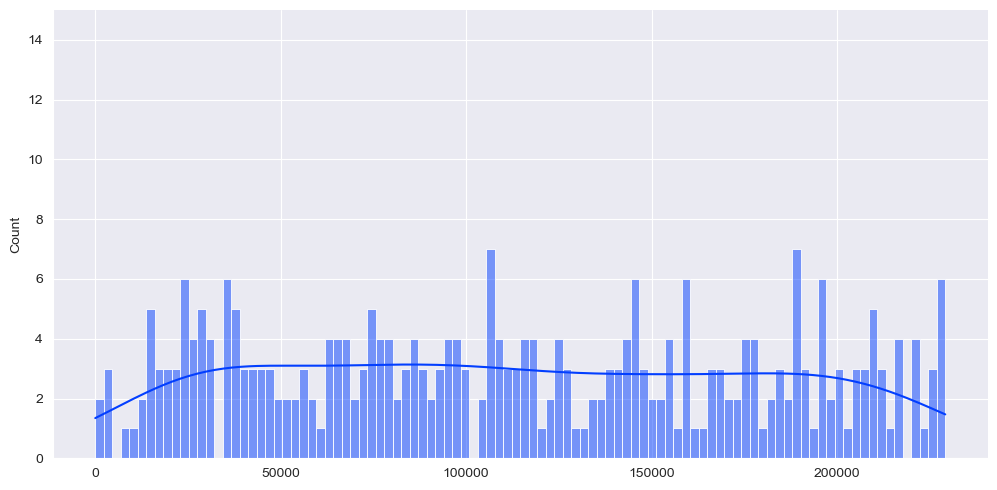

In [5]:
randomPals = np.array(np.random.randint(1, upper_bound+1, num_of_pals)) # Plot of randomly distributed data
randomPals = np.sort(randomPals)
sns.displot(randomPals, bins=100,kde = True, aspect = 2)
plt.ylim(top = 15)

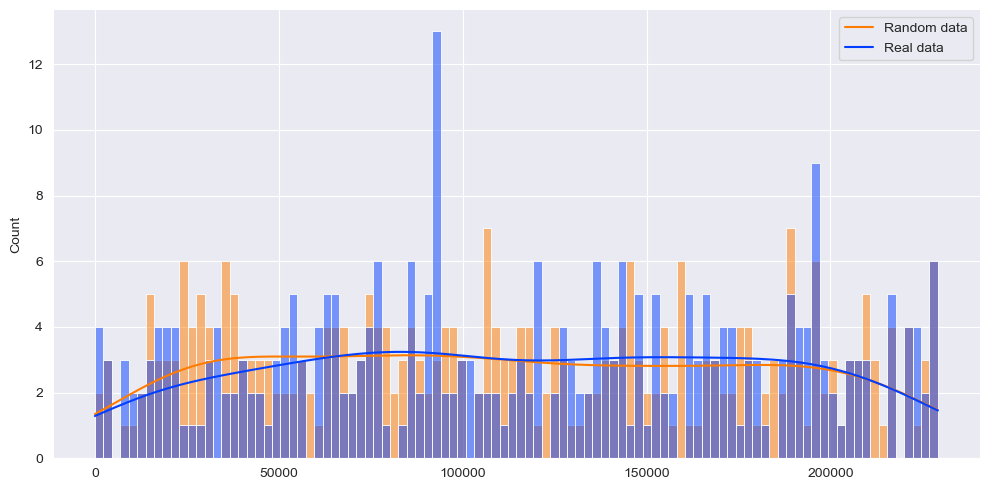

In [6]:
# And together
sns.displot([data, randomPals], bins=100,kde = True, aspect = 2, legend=False)
plt.legend(["Random data", "Real data"])

According to regression lines and what we see, they are pretty-pretty similar, and real-data line is at almost constant height, that can be interpreted like the real distribution probably uniform.

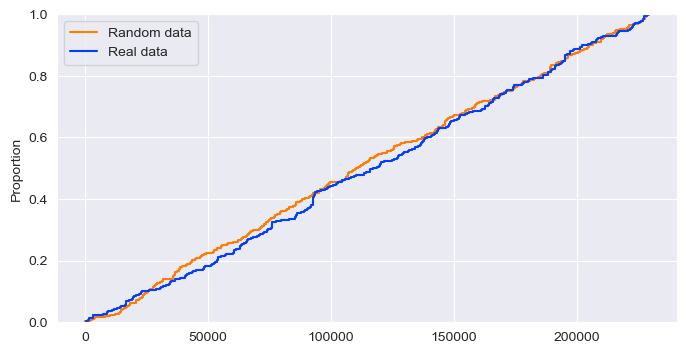

In [7]:
sns.ecdfplot([data, randomPals], legend = False)
plt.legend(["Random data", "Real data"])

Some inferences: We can see, that cumulative function of random data has less "jumps" than cdf of real data.
Also, real data has some periods without any palindromes, so cdf is constant, whereas random data does have such situations.
**Lets do exact KS-Test** before conclusions about their identity

In [8]:
print(sp.stats.ks_2samp(randomPals, data))

KstestResult(statistic=0.05067567567567568, pvalue=0.8425881123232881)


**P-value >0.05, so we can say that our data are taken from one distribution, but one of them is random(uniform). As a result, real data is also can be said to be from random(uniform) distribution.**

Ideally, we have equal probabilities for every bin that any randomly assigned palindrome will be assigned to that bin. Therefore, we may generally assume that random distribution is an uniform distribution when number of palindromes goes to infinity. This assumption will give us an concrete value for parameters in Poisson and other distributions

### Part 2. Evaluating spacings between hits in similated random data and given data.

Next part is to look at the distribution of spacings between hits. Since we work with distance, or 'time', between events, we can see an gamma distribution here. But we need a parameter **alpha** from Poisson distribution to work with gamma distribution
Firstly, lets check the distribution of spacings for some patterns

(0.0, 7862.35)

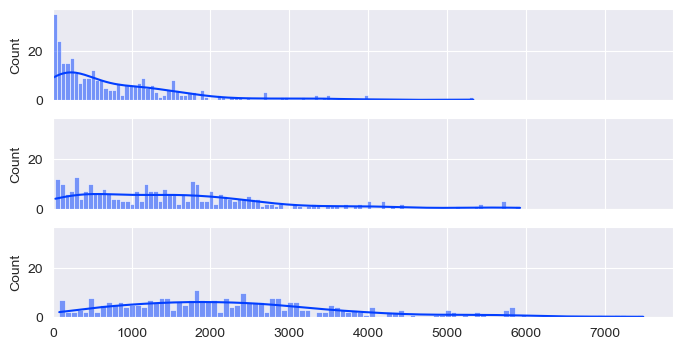

In [9]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
spacings1 =np.array([data[i] - data[i-1] for i in range(1, num_of_pals)])
spacings2 = np.array([data[i] - data[i-2] for i in range(2, num_of_pals)])
spacings3 = np.array([data[i] - data[i-3] for i in range(3, num_of_pals)])

sns.histplot(spacings1, bins = 100, kde = True, ax=axes[0])
sns.histplot(spacings2, bins = 100, kde = True, ax=axes[1])
sns.histplot(spacings3, bins = 100, kde = True, ax=axes[2])
plt.xlim(0)

We see kinda **gamma** distribution here.
**First** plot is the histogram of spacings between **2** neighbor palindromes
**Second** plot the same for spacings between edges of **3** palindromes in a row
**Third** plot the same for **4** palindromes in a row
Lets compare it with data from uniform random distribution, as we advised to do

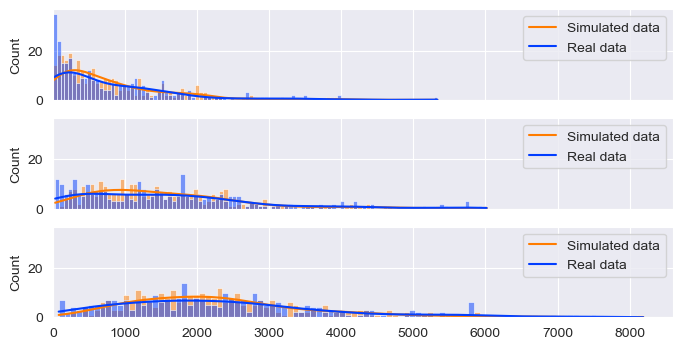

In [10]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
spacings1SIM =np.array([randomPals[i] - randomPals[i-1] for i in range(1, num_of_pals)])
spacings2SIM = np.array([randomPals[i] - randomPals[i-2] for i in range(2, num_of_pals)])
spacings3SIM = np.array([randomPals[i] - randomPals[i-3] for i in range(3, num_of_pals)])

sns.histplot([spacings1, spacings1SIM], bins = 100, kde = True, ax=axes[0])
sns.histplot([spacings2, spacings2SIM], bins = 100, kde = True, ax=axes[1])
sns.histplot([spacings3, spacings3SIM], bins = 100, kde = True, ax=axes[2])
plt.xlim(0)
for k in [1,2,0]:
    axes[k].legend(["Simulated data", "Real data"])

We got very similar results
##### However, after many simulations I got that we have too many close triplets than we should.

In [38]:
palsSusp = spacings2.argsort()+2 # for every argument we should add to have an index of the palindrom itself in data
ans2 = np.apply_along_axis(lambda x : data[x],0, palsSusp)[:50]

# Part 3. Counting palindromes in fixed intervals
Here we are advised to divide our data on intervals, count palindromes in such intervals, compare with data we generated earlier. We expect to see Poisson distribution. This comparison very depends on the data we got in random generating, therefore I did the comparison of of real data with not randomly generated, but generated from Poisson distribution data. Lambda would be the 294 divided by number of intervals, since lambda is the expected number of palindrome occurs in every interval

In [11]:
num_of_intervals = 50
step = int(upper_bound / num_of_intervals)
edges = np.arange(start = 0, stop = upper_bound,step = step) #in step either constant number or step variable from above
edges = np.append(edges, upper_bound)
dfReal = pd.DataFrame(data, columns=["value"])
dfReal["Interval"] = pd.cut(dfReal.value, edges)
dfReal.Interval = pd.Categorical(dfReal.Interval).codes + 1
print("The size of intervals is {} (except last one)".format(step)) #either constant number or step variable from above

The size of intervals is 4587 (except last one)


In [12]:
dfReal

,value,Interval
0,177,1
1,1321,1
2,1433,1
3,1477,1
4,3248,1
...,...,...
291,227238,50
292,227249,50
293,227316,50
294,228424,50


In [13]:
dfRealIntervals = dfReal.groupby("Interval").count() # Number of palindromes per every interval
dfRealIntervals = dfRealIntervals.rename({"value" : "count"}, axis = 1)
dfRealIntervals

,count
Interval,
1,7
2,3
3,4
4,7
5,8
6,2
7,4
8,6
9,5


In [14]:
dfRealIntervals.sum(axis=0) #Check that we have 296 in total

count    296
dtype: int64

For 50 intervals we have a problem that 47th interval does not have any palindromes, so lets add a row for htis interval by hands

In [15]:
dfRealIntervals = dfRealIntervals.reset_index()
dfRealIntervals = dfRealIntervals.append(pd.Series([47,0], index=dfRealIntervals.columns), ignore_index=True)
dfRealIntervals

C:\Users\porlu\AppData\Local\Temp\ipykernel_12728\1311038477.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRealIntervals = dfRealIntervals.append(pd.Series([47,0], index=dfRealIntervals.columns), ignore_index=True)


,Interval,count
0,1,7
1,2,3
2,3,4
3,4,7
4,5,8
5,6,2
6,7,4
7,8,6
8,9,5
9,10,4


In [16]:
dfRealCounts = dfRealIntervals.groupby("count").count()
dfRealCounts.rename({"Interval" : "how_many"}, axis = 1, inplace=True)
dfRealCounts.reset_index(inplace=True)
dfRealCounts

,count,how_many
0,0,1
1,1,2
2,2,1
3,3,4
4,4,8
5,5,8
6,6,5
7,7,9
8,8,4
9,9,5


In [17]:
dfRealCounts.how_many.sum(axis=0) #number of intervals

50

Now lets generate poisson data and do chi2 test and visualization

In [18]:
mu = 294 / num_of_intervals #how many palindromes in average in every interval
expected_counts = [sp.stats.poisson.pmf(i, mu) * num_of_intervals for i in range(0, int(mu*5))]
expected_counts

[0.13973926375184217,
 0.8216668708608323,
 2.4157006003308457,
 4.734773176648459,
 6.960116569673231,
 8.185097085935718,
 8.02139514421701,
 6.737971921142284,
 4.952409362039575,
 3.235574116532524,
 1.9025175805211212,
 1.0169821248603803,
 0.49832124118158894,
 0.22539453062674947,
 0.09466570286323436,
 0.03710895552238783,
 0.013637541154477528,
 0.004716984822842817,
 0.0015408817087953239,
 0.0004768623393535009,
 0.00014019752776992878,
 3.925530777558019e-05,
 1.0491873169109533e-05,
 2.682270184102793e-06,
 6.571561951051887e-07,
 1.5456313708874002e-07,
 3.4955047926222795e-08,
 7.612432659488543e-09,
 1.5986108584925783e-09]

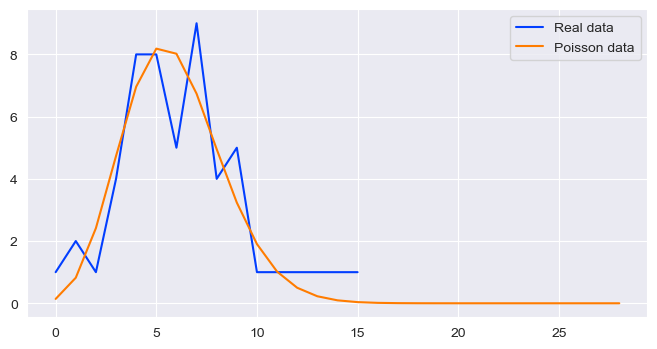

In [19]:
plt.plot(dfRealCounts["count"], dfRealCounts["how_many"])
plt.plot(np.arange(0, expected_counts.__len__()), expected_counts)
plt.legend(["Real data", "Poisson data"])

In [20]:
dfExpected = pd.DataFrame(expected_counts, columns=["how_many"]).reset_index()
dfExpected.rename({"index" : "count"}, axis = 1, inplace=True)
dfSummary = dfExpected.merge(dfRealCounts, how="outer", on="count", suffixes=("_expected", "_real")).fillna(0)
dfSummary

,count,how_many_expected,how_many_real
0,0,1.397393e-01,1.0
1,1,8.216669e-01,2.0
2,2,2.415701e+00,1.0
3,3,4.734773e+00,4.0
4,4,6.960117e+00,8.0
5,5,8.185097e+00,8.0
6,6,8.021395e+00,5.0
7,7,6.737972e+00,9.0
8,8,4.952409e+00,4.0
9,9,3.235574e+00,5.0


Now we can proceed with chi2 test, but firstly we need one thing. In chi2 test we should divide by expected number of occurences, but we have zero expectation for some values like 0, 12,13 etc. Therefore, lets group them in order not to have zeros in denominators. We combine counts 0-2 and 10-17 for number of intervals equal to 50 specifically, so next calculations are **not valid** for other values

In [21]:
#sp.stats.chisquare(dfSummary["how_many_expected"], dfSummary["how_many_real"])
line = dfSummary.iloc[:3][["how_many_expected", "how_many_real"]].sum(axis=0)
line["count"] = "0-2"

line2 = dfSummary.iloc[:9:-1][["how_many_expected", "how_many_real"]].sum(axis=0)
line2["count"] = "10-17"
dfSummary.drop(dfSummary.index[:9:-1], inplace=True)
dfSummary.drop(dfSummary.index[:3], inplace=True)
dfSummary = dfSummary.append(line, ignore_index=True)
dfSummary = dfSummary.append(line2, ignore_index=True)
dfSummary

C:\Users\porlu\AppData\Local\Temp\ipykernel_12728\1107928498.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfSummary = dfSummary.append(line, ignore_index=True)
C:\Users\porlu\AppData\Local\Temp\ipykernel_12728\1107928498.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfSummary = dfSummary.append(line2, ignore_index=True)


,count,how_many_expected,how_many_real
0,3,4.734773,4.0
1,4,6.960117,8.0
2,5,8.185097,8.0
3,6,8.021395,5.0
4,7,6.737972,9.0
5,8,4.952409,4.0
6,9,3.235574,5.0
7,0-2,3.377107,4.0
8,10-17,3.795556,3.0


In [22]:
# chi2 test on columns how_many_expected and how_many_real
sp.stats.chisquare(dfSummary["how_many_expected"], dfSummary["how_many_real"])

Power_divergenceResult(statistic=3.8261004198387285, pvalue=0.8724624662844002)

p-value if 0.87 that is very high, so we can assume that real distribution of number of palindromes in intervals follow the Poisson distribution

# Summary
After all parts above, we can say that our real data follows uniform random distribution, but we have some inconsistencies.

We are asked to give some advices that derived from such inconsistencies. So:
1) Obviously, the cluster in ~80000 is pretty suspicious whatever distribution we have
2) There are too many short triplets of palindromes. They worth checking, first 50 given below. Every number is the number of third in its triplet
3) We have too many intervals that contain 7 palindromes. Probably answer in some of there?
4) Also we have too few intervals that contain 6 palindromes

In [73]:
ans2.tolist() # Locations for the 2nd line of summary

[162715,
 3286,
 186210,
 195151,
 92747,
 165931,
 92709,
 92783,
 63023,
 227316,
 190996,
 195117,
 75878,
 195221,
 195262,
 92859,
 92643,
 85640,
 174260,
 54142,
 92701,
 174185,
 188137,
 1477,
 143738,
 75812,
 115818,
 197191,
 66015,
 127046,
 76043,
 19415,
 76124,
 65802,
 147878,
 174132,
 152331,
 34403,
 143555,
 180435,
 9333,
 119977,
 227249,
 191298,
 137695,
 34723,
 93110,
 164072,
 216539,
 93601]

In [70]:
dfRealIntervals[(dfRealIntervals["count"] == 6) | (dfRealIntervals["count"] == 7) ].Interval * step
# This is the points where suspicious interval start

0       4587
3      18348
7      36696
14     68805
18     87153
19     91740
26    123849
27    128436
30    142197
31    146784
32    151371
33    155958
36    169719
45    211002
Name: Interval, dtype: int64